<a href="https://colab.research.google.com/github/Tarheen-Fatima/GAN-Based-Art-Generator/blob/main/GAN_MNIST_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow matplotlib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, LeakyReLU, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
def build_generator():
    model = Sequential()

    model.add(Dense(128 * 7 * 7, activation="relu", input_dim=100))
    model.add(Reshape((7, 7, 128)))

    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2D(1, (7, 7), activation='tanh', padding='same'))

    return model

def build_discriminator():
    model = Sequential()

    model.add(Conv2D(64, (3, 3), padding="same", input_shape=(28, 28, 1)))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))

    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))

    return model

def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential([generator, discriminator])
    return model

In [ ]:
generator = build_generator()
discriminator = build_discriminator()

discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])

gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.datasets import mnist

(X_train, _), (_, _) = mnist.load_data()
X_train = X_train / 127.5 - 1.0
X_train = np.expand_dims(X_train, axis=-1)

def train_gan(generator, discriminator, gan, X_train, epochs=10000, batch_size=128, save_interval=1000):
    half_batch = batch_size // 2

    for epoch in range(epochs):
        idx = np.random.randint(0, X_train.shape[0], half_batch)
        real_images = X_train[idx]

        noise = np.random.normal(0, 1, (half_batch, 100))
        fake_images = generator.predict(noise)

        real_labels = np.ones((half_batch, 1))
        fake_labels = np.zeros((half_batch, 1))

        d_loss_real = discriminator.train_on_batch(real_images, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        noise = np.random.normal(0, 1, (batch_size, 100))
        valid_y = np.ones((batch_size, 1))

        g_loss = gan.train_on_batch(noise, valid_y)

        if epoch % save_interval == 0:
            print(f"{epoch} [D loss: {d_loss[0]}, acc.: {100 * d_loss[1]}] [G loss: {g_loss}]")
            save_images(epoch, generator)

def save_images(epoch, generator, examples=25, dim=(5, 5), figsize=(5, 5)):
    noise = np.random.normal(0, 1, (examples, 100))
    generated_images = generator.predict(noise)

    generated_images = 0.5 * generated_images + 0.5
    plt.figure(figsize=figsize)
    for i in range(examples):
        plt.subplot(dim[0], dim[1], i + 1)
        plt.imshow(generated_images[i, :, :, 0], cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

Enter mood (calm, chaos, or neutral): neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


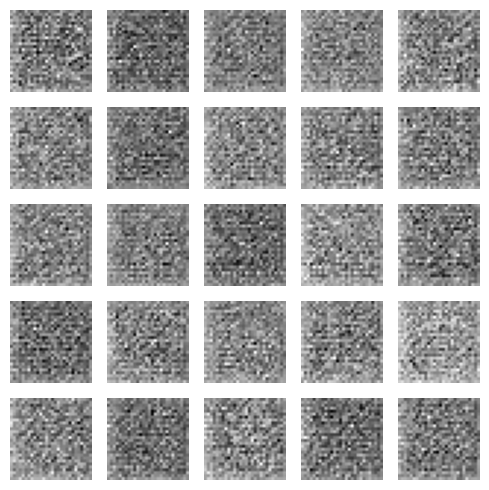

In [ ]:
# Function to generate art based on user mood
def generate_art(mood):
    # Adjust noise based on mood
    if mood == "calm":
        noise = np.random.normal(0, 0.5, (25, 100))  # Lower variance for smoother art
    elif mood == "chaos":
        noise = np.random.normal(0, 2, (25, 100))    # Higher variance for chaotic art
    else:
        noise = np.random.normal(0, 1, (25, 100))    # Default noise for neutral mood

    generated_images = generator.predict(noise)
    generated_images = 0.5 * generated_images + 0.5

    # Display generated images
    plt.figure(figsize=(5, 5))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.imshow(generated_images[i, :, :, 0], cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

#Example
mood = input("Enter mood (calm, chaos, or neutral): ")
generate_art(mood)